### EDA ON HEART DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [5]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [6]:
df['FastingBS'].unique()

array([0, 1])

In [7]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [8]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encode.fit_transform(df[col])

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [15]:
df['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [16]:
rows = df[df['Oldpeak'] == 0.6]
rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
621,56,1,2,130,256,1,0,142,1,0.6,1,1
642,51,0,2,120,295,0,0,157,0,0.6,2,0
669,45,0,1,130,234,0,0,175,0,0.6,1,0
680,57,1,0,150,276,0,0,112,1,0.6,1,1
686,57,0,0,120,354,0,1,163,1,0.6,2,0
715,44,0,2,108,141,0,1,175,0,0.6,1,0
757,50,1,2,140,233,0,1,163,0,0.6,1,1
798,42,0,0,102,265,0,0,122,0,0.6,1,0
822,58,1,2,105,240,0,0,154,1,0.6,1,0
861,65,1,0,110,248,0,0,158,0,0.6,2,1


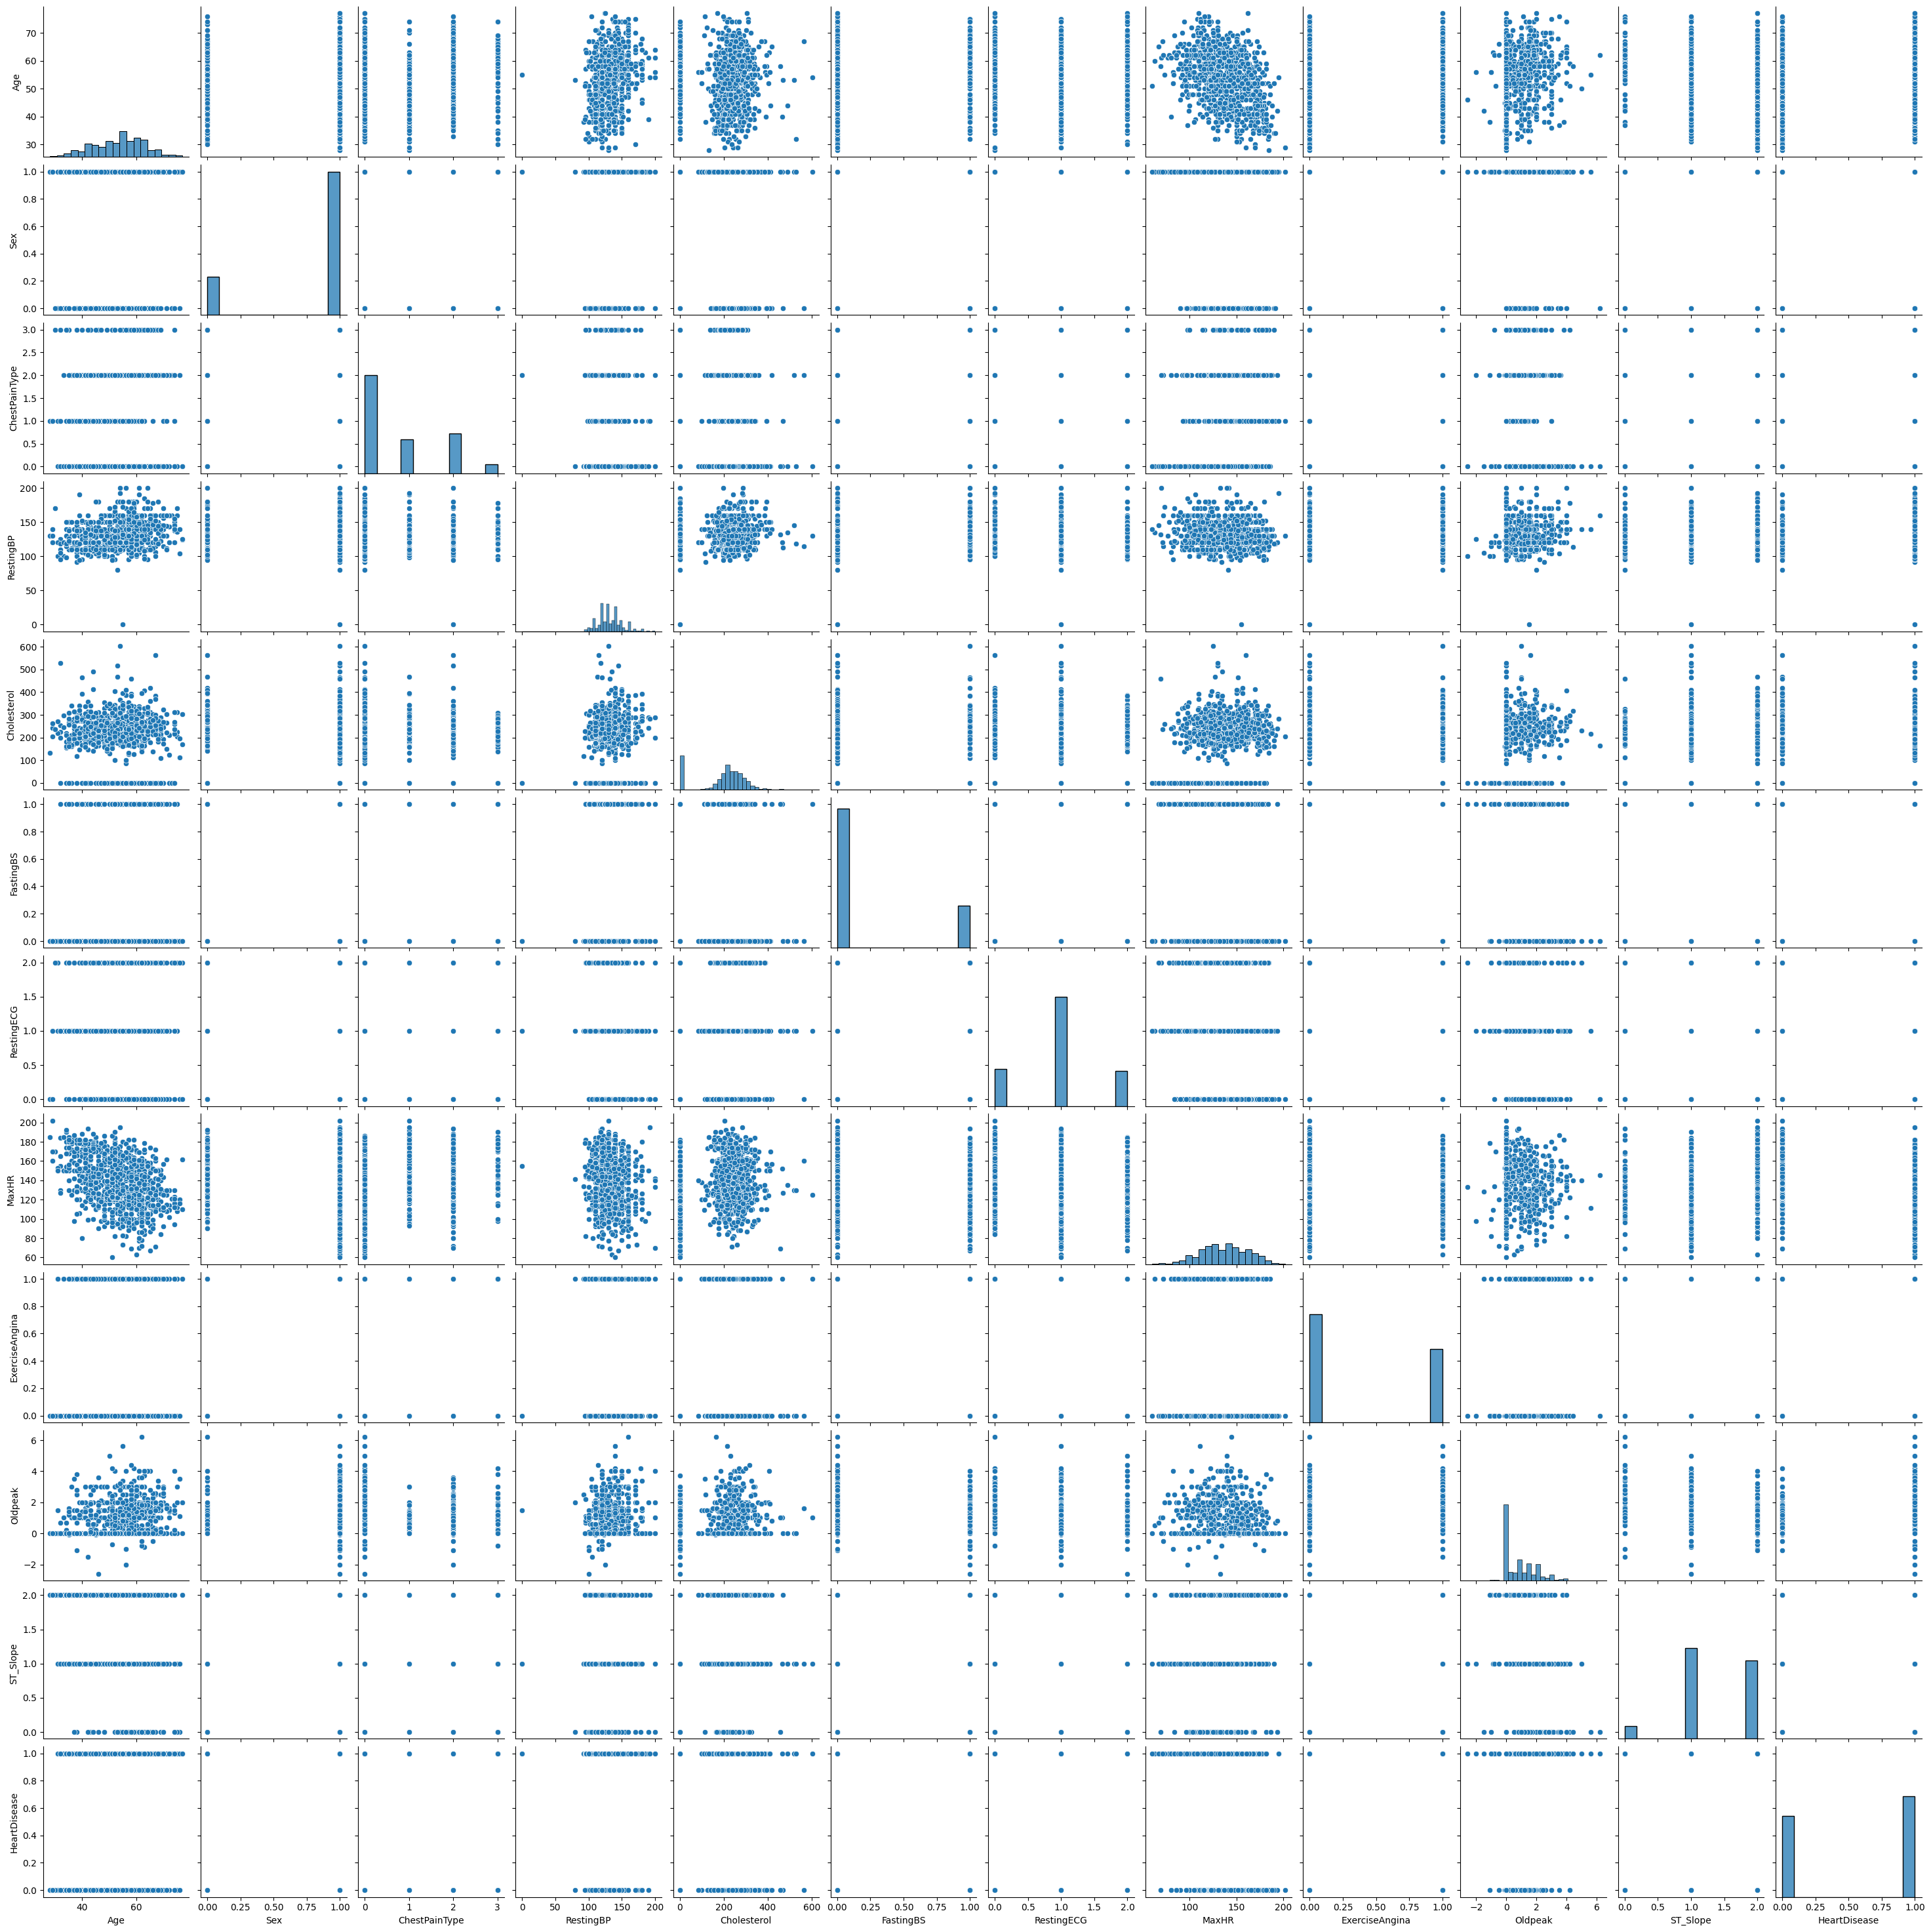

In [17]:
# num = df.select_dtypes(include='number')
sns.pairplot(data = df)

In [9]:
num = df.select_dtypes(include='number')
corr = num.corr()
corr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<Axes: >

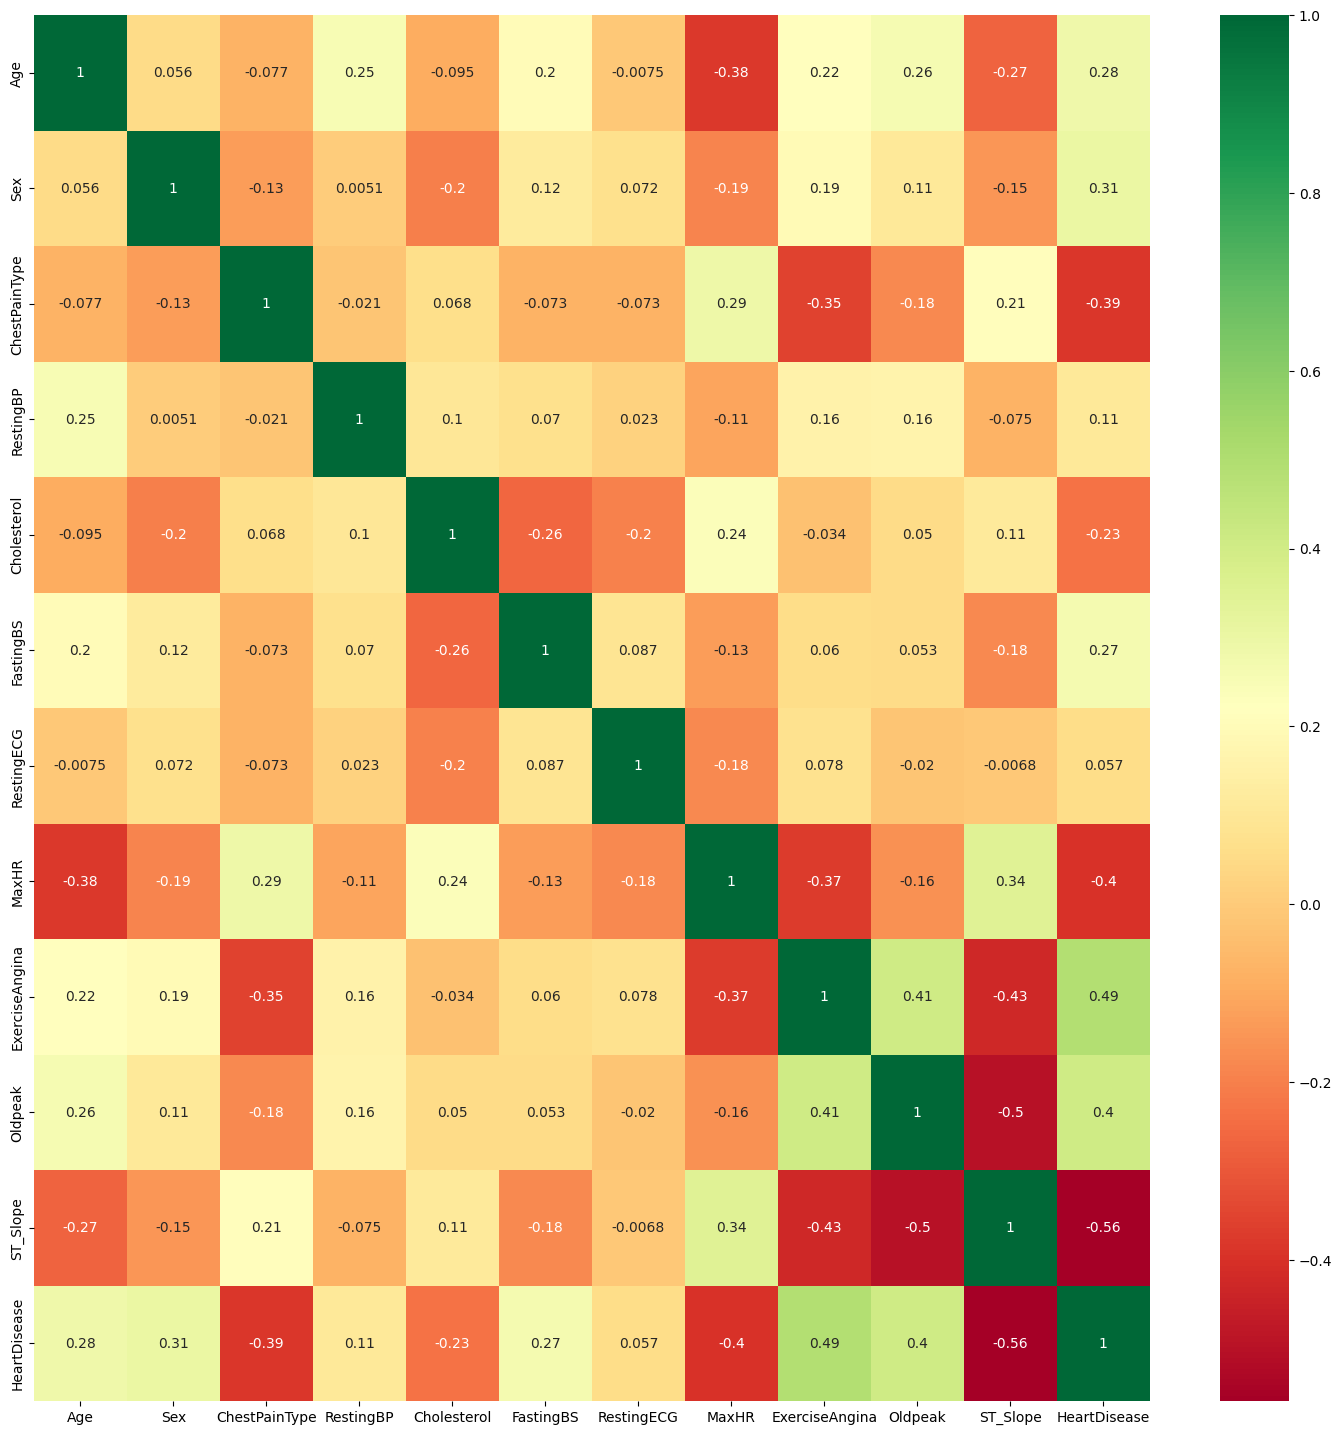

In [10]:
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='RdYlGn', annot = True)

In [20]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
skew = df.skew()
print(skew)
kurtosis = df.kurt()
print(kurtosis)

Age              -0.195933
Sex              -1.424540
ChestPainType     0.793916
RestingBP         0.179839
Cholesterol      -0.610086
FastingBS         1.264484
RestingECG        0.008492
MaxHR            -0.144359
ExerciseAngina    0.391329
Oldpeak           1.022872
ST_Slope         -0.381382
HeartDisease     -0.215086
dtype: float64
Age              -0.386140
Sex               0.029372
ChestPainType    -0.717257
RestingBP         3.271251
Cholesterol       0.118208
FastingBS        -0.401960
RestingECG       -0.487634
MaxHR            -0.448248
ExerciseAngina   -1.850898
Oldpeak           1.203064
ST_Slope         -0.665597
HeartDisease     -1.958008
dtype: float64


In [ ]:
# r2_score - finds the avg of prediction and actual value 
# accuracy_score - calculate the probability that the value is either near to 0 or 1 

### Implementation of DecisionTREEClassifier

In [12]:
x = df.drop('HeartDisease', axis = 1)
# x.describe().T

In [13]:
y = df['HeartDisease']
# y.describe()

In [22]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_train = dtree.predict(x_train)
y_pred_test = dtree.predict(x_test)

# Precision, Recall, and F1 for train data
precision_train = precision_score(y_train, y_pred_train, average='binary')
recall_train = recall_score(y_train, y_pred_train, average='binary')
f1_train = f1_score(y_train, y_pred_train, average='binary')

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)

Train Precision: 1.0
Train Recall: 1.0
Train F1-score: 1.0
Test Precision: 0.8181818181818182
Test Recall: 0.7741935483870968
Test F1-score: 0.7955801104972375


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier(n_estimators= 300,
                                learning_rate=0.1,
                                max_depth=5,
                                subsample=0.8,
                                max_features='sqrt')
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
r2 = accuracy_score(y_test, y_pred)
print(r2)

0.8913043478260869


In [35]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_train = dtree.predict(x_train)
y_pred_test = dtree.predict(x_test)

# Accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 1.0
Test Accuracy: 0.8043478260869565


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Precision, Recall, and F1 for train data
precision_train = precision_score(y_train, y_pred_train, average='binary')
recall_train = recall_score(y_train, y_pred_train, average='binary')
f1_train = f1_score(y_train, y_pred_train, average='binary')

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)


Train Precision: 1.0
Train Recall: 1.0
Train F1-score: 1.0
Test Precision: 0.8877551020408163
Test Recall: 0.8613861386138614
Test F1-score: 0.8743718592964824


In [36]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)


Train Accuracy: 1.0
Test Accuracy: 0.8586956521739131


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import r2_score

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# SVC model
svc_model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.
svc_model.fit( x_train, y_train)

# Predict and calculate accuracy
y_pred_train = svc_model.predict(x_train)
y_pred_test = svc_model.predict(x_test)

# Precision, Recall, and F1 for train data
precision_train = precision_score(y_train, y_pred_train, average='binary')
recall_train = recall_score(y_train, y_pred_train, average='binary')
f1_train = f1_score(y_train, y_pred_train, average='binary')

# Precision, Recall, and F1 for test data
precision_test = precision_score(y_test, y_pred_test, average='binary')
recall_test = recall_score(y_test, y_pred_test, average='binary')
f1_test = f1_score(y_test, y_pred_test, average='binary')

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)




Train Precision: 0.8755980861244019
Train Recall: 0.8992628992628993
Train F1-score: 0.8872727272727273
Test Precision: 0.86
Test Recall: 0.8514851485148515
Test F1-score: 0.8557213930348259


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_train = svc_model.predict(x_train)
y_pred_test = svc_model.predict(x_test)

# Accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test) 

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.8732970027247956
Test Accuracy: 0.842391304347826


In [40]:
df.shape

(918, 12)